In [10]:
#foreign패키지 설치 - 외부 데이터 읽는 패키지
#foreign패키지 설치 - 외부 데이터 읽는 패키지
library(foreign)
library(dplyr)
library(ggplot2)
raw_welfare<-read.spss("c://Users//user//desktop//RR//data_spss_Koweps2014.sav",to.data.frame=T)
welfare<-raw_welfare
dim(welfare)
head(welfare)
#summary(welfare)
#View(welfare)

Warning message in read.spss("c://Users//user//desktop//RR//data_spss_Koweps2014.sav", :
"c://Users//user//desktop//RR//data_spss_Koweps2014.sav: Compression bias (0) is not the usual value of 100"

[1] 7048 1081

h09_id,h09_ind,h09_sn,h09_merkey,h_new,h09_cobf,h09_ws,h09_wg,h09_reg5,h09_reg7,...,h0916_56,h0916_60,h0916_64,h0917_1,h0917_2,h0917_3,h0917_4,h0917_5,h0917_6,h0917_7
1,1,1,10101,0,NA,0.3722699,961.6440,1,1,...,NA,NA,NA,7,4,4,3,2,3,2
2,1,1,20101,0,NA,0.5174442,1336.6571,1,1,...,NA,NA,NA,0,NA,3,1,4,2,1
3,1,1,30101,0,NA,0.6073695,1568.9513,1,1,...,NA,NA,NA,0,NA,2,1,1,1,1
4,1,1,40101,0,NA,0.3568641,921.8481,1,1,...,NA,NA,NA,0,NA,2,1,2,2,1
6,1,1,60101,0,NA,0.4652189,1201.7490,1,1,...,NA,NA,NA,0,NA,4,1,3,3,1
7,1,1,70101,0,NA,0.2478946,640.3591,4,7,...,NA,NA,NA,0,NA,1,1,4,1,1


[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.309   2.000   2.000 


   1    2 
4873 2175 


female   male 
  2175   4873 

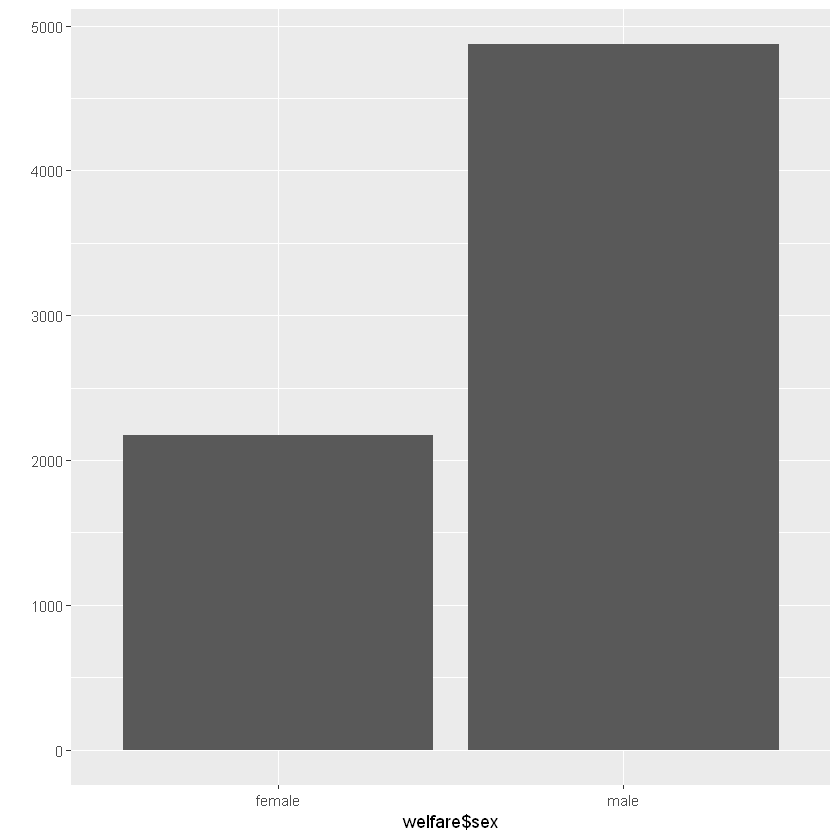

In [14]:
#1 성별에 따른 소득 분석하기
welfare<-rename(welfare,sex=h0901_4,birth=h0901_5,income=h09_din)
class(welfare$sex) # 데이터의 속성 확인
summary(welfare$sex)
table(welfare$sex) # 이상치 확인
welfare$sex<-ifelse(welfare$sex==1,"male","female") # NUMERIC 대신 남성, 여성으로 정의
table(welfare$sex)
qplot(welfare$sex)
# 확인해보면 남성의 비율이 여성보다 훨씬 높다
# 왜 그럴까?
# 위 조사 대상이 가구주의 성별인데, 가구주다 보니 남성이 높게 나타났다.
# 즉 여성이 가구주인 경우는 1인 가구일 가능성이 높고,
# 나머지 모든 경우 남성이 가구주로 나타났을 수 있겠다고 판단할 수 있다.
# 그렇다면 데이터를 1인 가구만 한정시켜서 비교해야 한다.

In [15]:
class(welfare$income)
summary(welfare$income)
#데이터를 보면, 최소값은 -20516 즉 약 -2억이다.
#하지만 이는 가처분소득이기 때문에, 잘못 입력된 값이 아니다.
#부채가 소득보다 낮기 때문에 - 값이 된 것이다.
#그리고 평균이 3300만원으로 나타났는데, 이를 그대로 대한민국 평균의 소득은 3300만원이라는 결론을 내는 것은 적절하지 않다.
#위 데이터에는 1인 가구도 있고, 가족구성원이 많은 경우도 모두 들어있다.
#즉 10명이 같이 살면 10명의 소득이 모두 합쳐져있다.
#그리고 소득이 없을 확률이 높은 80~90대 가구 등 다양한 경우가 있기 때문
#따라서 데이터를 상황에 맞게 더 분류해서 결론을 내야한다.

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -20516    1108    2404    3336    4642  108888 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


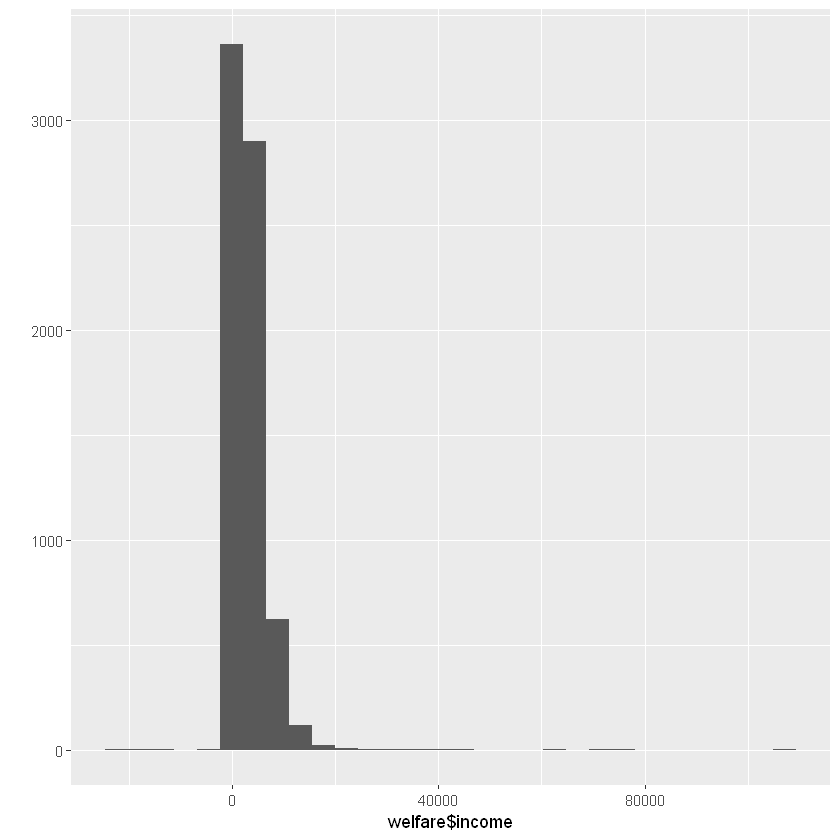

In [17]:
qplot(welfare$income)
#이렇게 보면 이상치 때문에 그래프가 고르게 분포되지 않는다.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 255 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

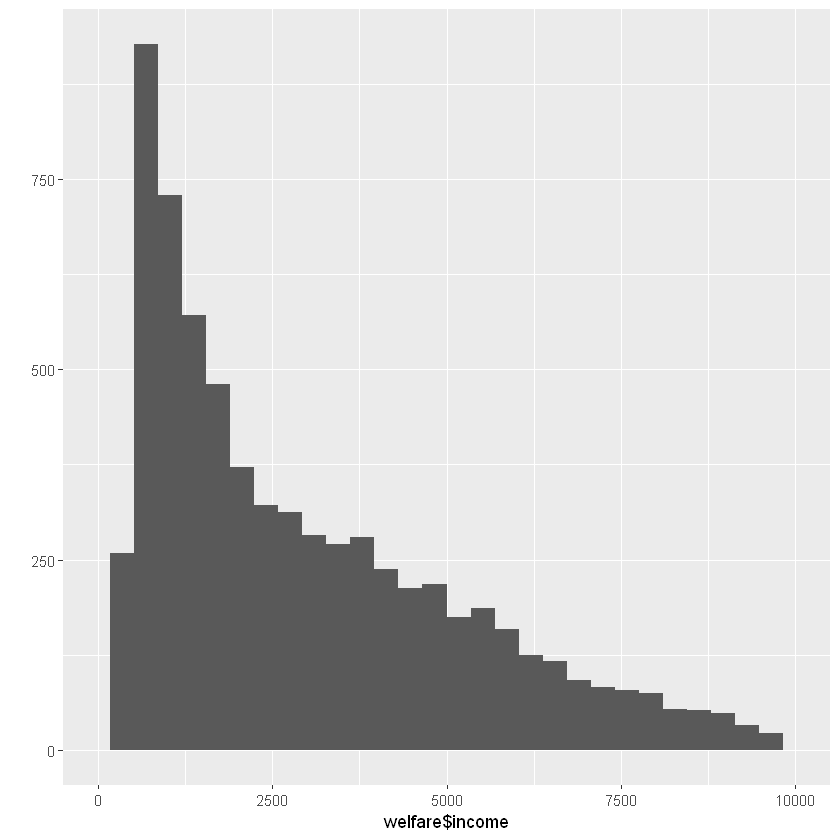

In [18]:
qplot(welfare$income)+xlim(0,10000)

sex,mean_income
female,1581.255
male,4118.903


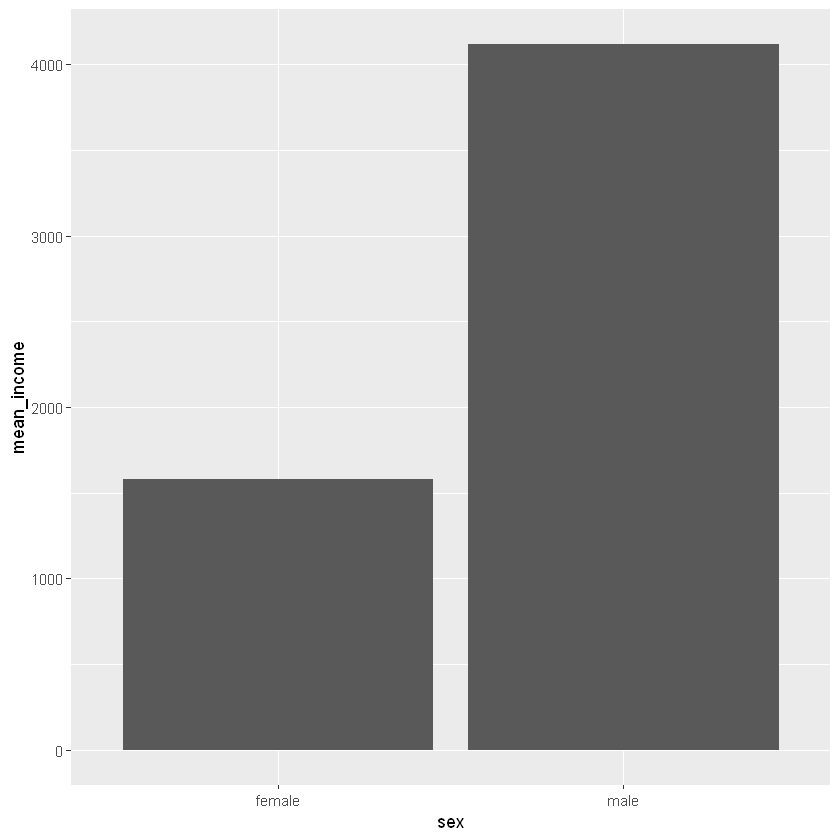

In [19]:
sex_income<-welfare %>% 
  group_by(sex) %>% 
  summarise(mean_income=mean(income))
sex_income
ggplot(data=sex_income,aes(x=sex,y=mean_income))+geom_col()
#앞서 언급했듯, 이것이 여자-남자 소득 차이라고 설명할 수 없다.
#조사 대상이 가구주이고, 1인 가구 대상도 아니기 때문에

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1918    1940    1952    1953    1966    2002 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



FALSE 
 7048 

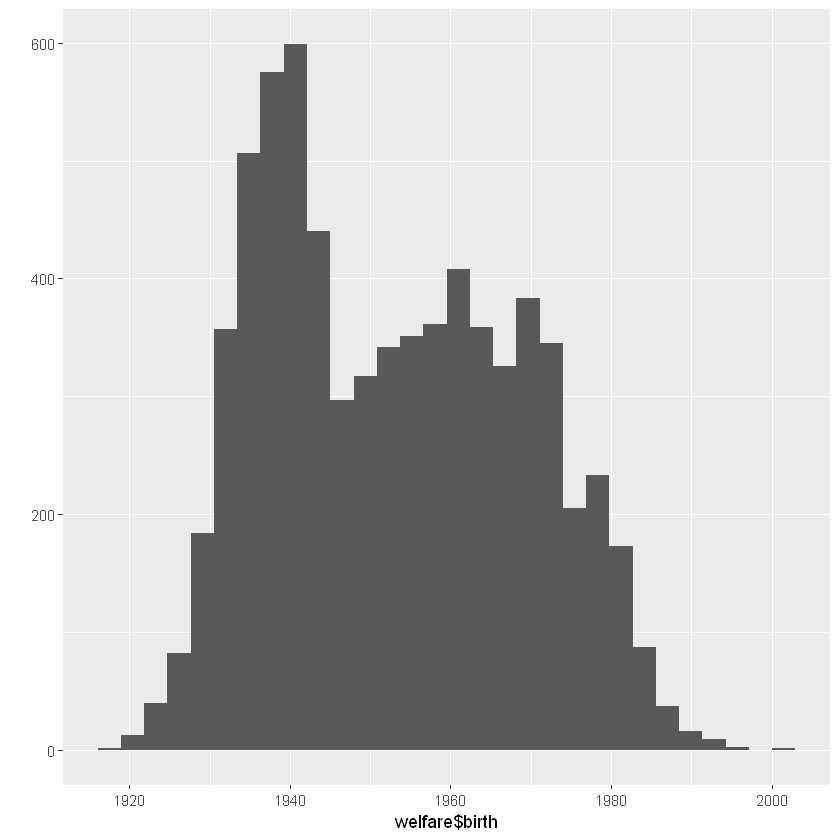

In [22]:
#조사 대상 연령대 분포 확인
class(welfare$birth)
summary(welfare$birth)
qplot(welfare$birth)
#나이 분포를 확인해보면 노년층의 비율이 높다.
#애초에 조사 목적에 노년층의 특성을 반영하기 위함이 있었기 때문에 노년층 표집 비율을 높게 잡았기 때문
#따라서 평균적으로 데이터가 노년층 특성이 더 반영되어있다는 것을 염두에 두어야한다.
table(is.na(welfare$birth)) # 결측치 확인

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   49.00   63.00   62.01   75.00   97.00 

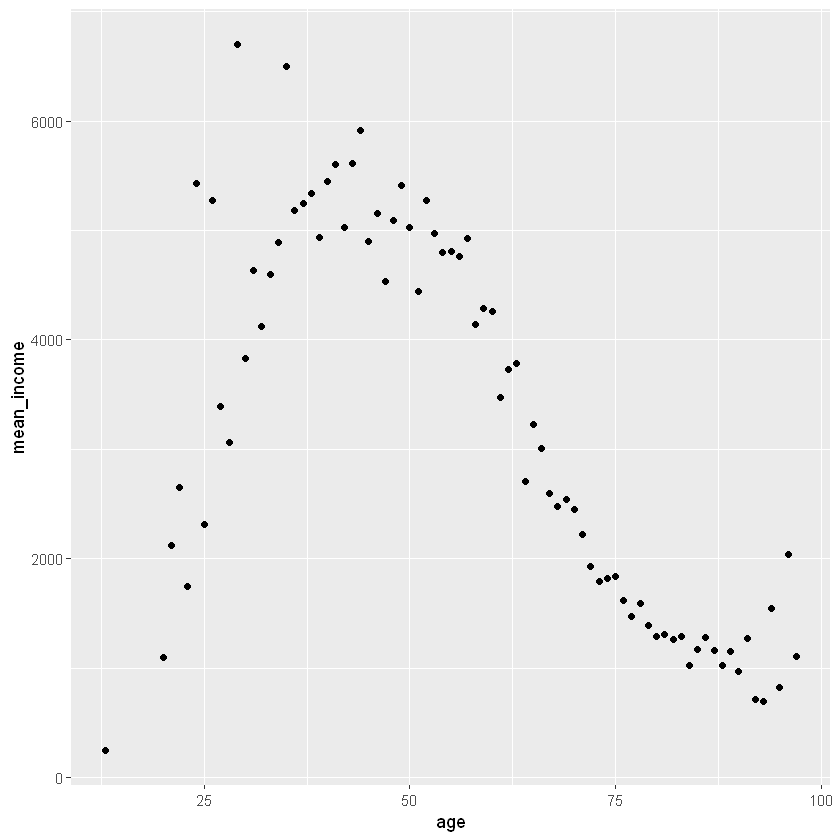

age,mean_income
13,252.000
20,1094.900
21,2117.600
22,2656.000
23,1748.250
24,5429.600
25,2310.400
26,5273.371
27,3394.980
28,3061.222


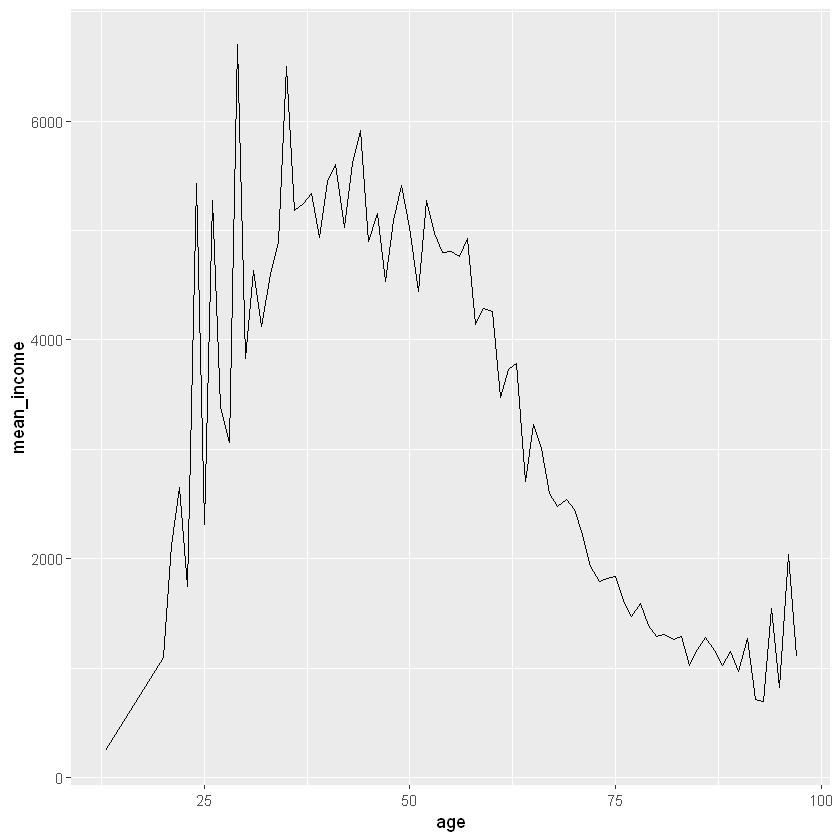

In [24]:
#탄생년도 데이터를 나이 데이터로 변환하기
welfare$age<-2014-welfare$birth+1
summary(welfare$age)
#나이별 소득 평균 분석
age_income<-welfare %>%
  group_by(age) %>% 
  summarise(mean_income=mean(income))
ggplot(data=age_income,aes(x=age,y=mean_income))+geom_point()
ggplot(data=age_income,aes(x=age,y=mean_income))+geom_line()
#이 때 주의할 사항#
age_income
#13,80,81과 같은 표본이 많지 않은 경우는 어떨까?
#만약 표본이 1명..30명 이런 경우, 우리나라의 전체 13세를 대표한다고 할 수 없다.
#따라서 표본이 적다고 예상될 경우, grouping을 해주는 것도 방법이다.
#아예 10대, 20대, 80대 이렇게 총합을 구해서 하면 표본이 확보될 것이다.


middle    old  young 
  3004   3979     65 

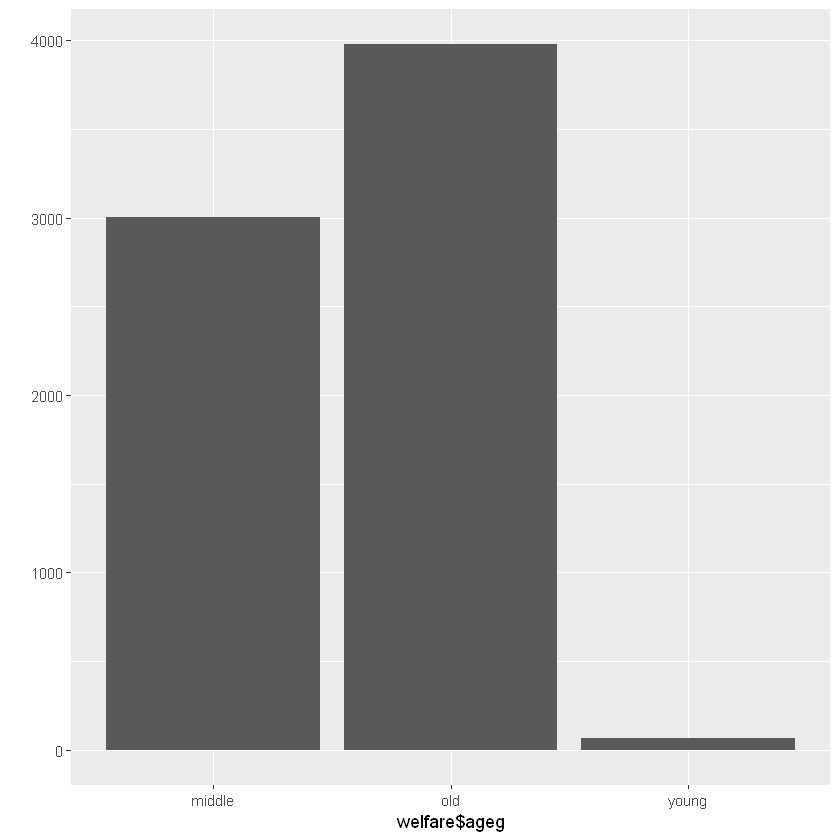

In [25]:
#연령대 따라 나누기 ( ~20대 = young, 30~50대 = middle, 60대~ = old)
welfare<-welfare %>% 
  mutate(ageg=ifelse(age<30,"young",ifelse(age<=59,"middle","old")))
table(welfare$ageg)
qplot(welfare$ageg)
#이렇게 묶어봐도 30대 이하의 가구주의 경우 너무 적게 나타나기 때문에 대표성을 위해 제거하는 것이 바람직하다는 판단이 가능하다.

ageg,mean_income
middle,5017.822
old,2049.348


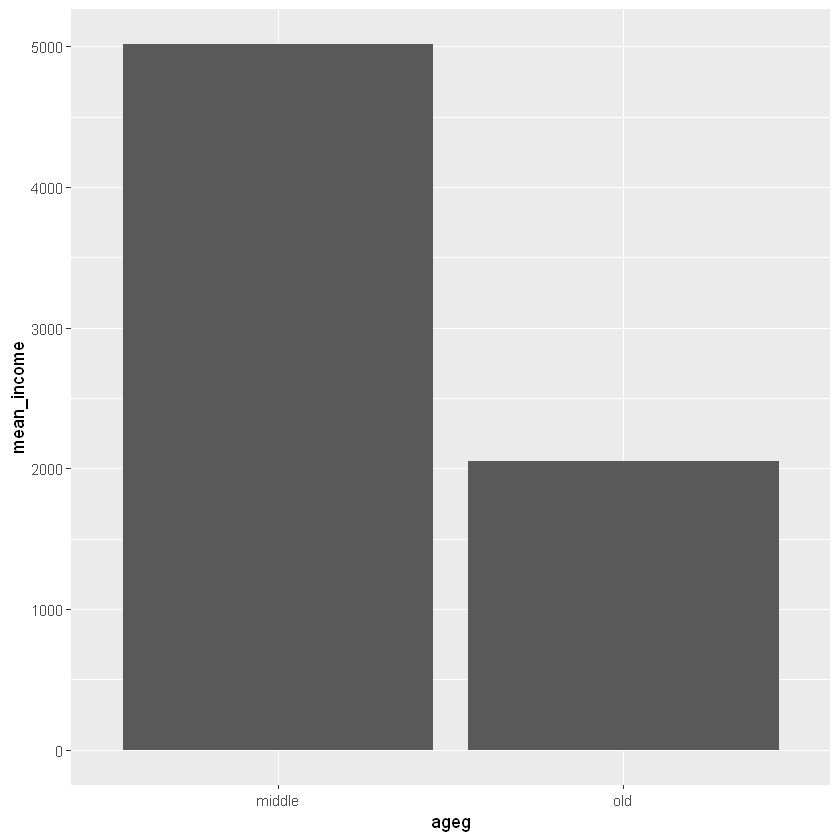

In [26]:
#young 연령대를 제거하고 분석
welfare_income<-welfare %>% 
  filter(ageg!="young") %>% 
  group_by(ageg) %>% 
  summarise(mean_income=mean(income))

welfare_income
ggplot(data=welfare_income,aes(x=ageg,y=mean_income))+geom_col()

ageg,sex,mean_income
middle,female,2868.804
middle,male,5420.444
old,female,1179.192
old,male,2674.162


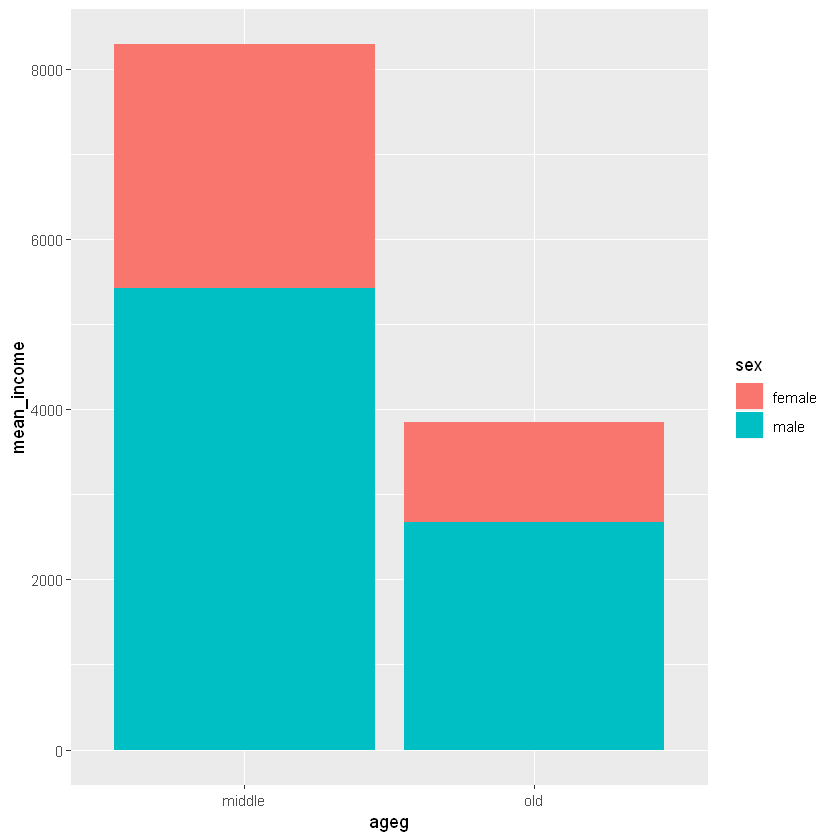

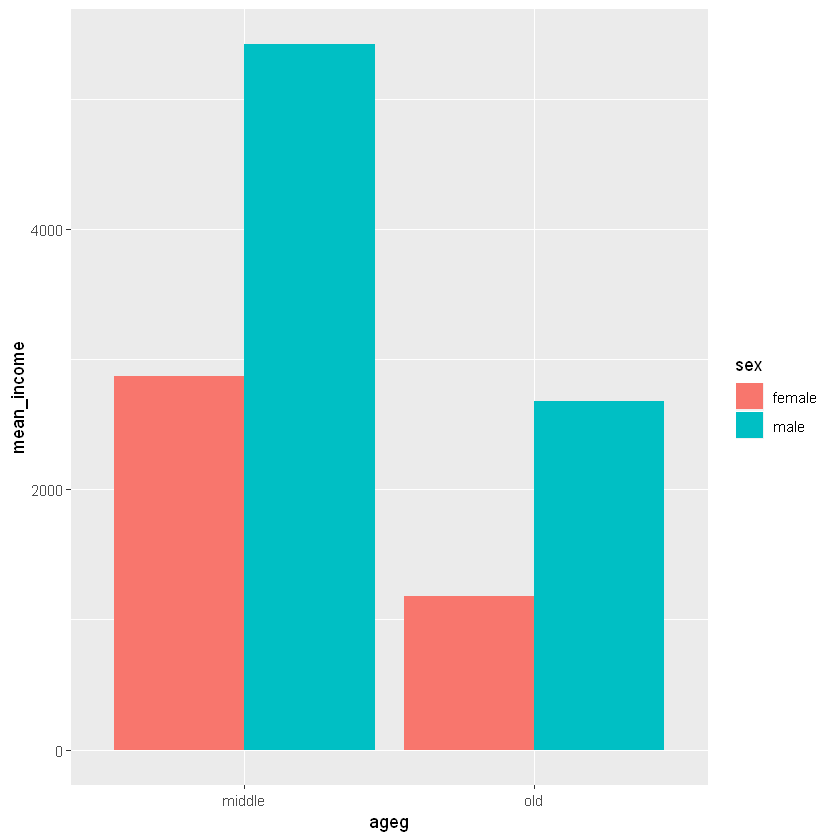

In [27]:
#연령대 및 성별에 따른 소득
#일단 young은 대표성이 없다는 것을 알았으니 제거하고 진행
sex_income<-welfare %>% 
  filter(ageg!="young") %>% 
  group_by(ageg,sex) %>% 
  summarise(mean_income=mean(income))
sex_income
ggplot(data=sex_income,aes(x=ageg,y=mean_income,fill=sex))+geom_col()
ggplot(data=sex_income,aes(x=ageg,y=mean_income,fill=sex))+geom_col(position="dodge")